# Imports

In [1]:
from vip_hci.fits import open_fits,write_fits
import numpy as np
from matplotlib import pyplot as plt
from hciplot import plot_frames
import pandas as pd
import seaborn as sns
from scipy.signal import convolve2d
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import vip_hci as vip

In [3]:
vip.__version__

'1.3.2'

In [3]:
from CCFcore.PreProcess import SINFONI
from CCFcore.CrossCorr import CrossCorr
from CCFcore import removeTelluric
import multiprocessing
from contextlib import contextmanager
from CCFcore import removeTelluric,applyFilter,measureSpatialSpec
from vip_hci.preproc.cosmetics import frame_center,cube_crop_frames,frame_crop
from vip_hci.preproc.derotation import cube_derotate
from vip_hci.metrics.stim import stim_map
from vip_hci.metrics.snr_source import snrmap
from vip_hci.var.shapes import mask_circle
from vip_hci.metrics.roc import compute_binary_map
from vip_hci.hci_postproc import median_sub
from hciplot import plot_frames
from vip_hci.fm.fakecomp import cube_inject_companions

In [4]:
plt.style.use('seaborn')

# Difference between the methods Figs 1 and 2

In [5]:
temp_path = "/mnt/disk12tb/Users/rakesh/SpatialDetection//Templates/BT-Settl_M-0.0a+0.0/"
    #fl_insert="lte1300-3.00-0.0a+0.0.BT-settl-giant-2013.cf250.tm1.0-0.0.R1-g12p0sc2.spid.fits"
fl_insert="lte013.0-3.0-0.0a+0.0.BT-Settl.spec.fits.gz"
datapath="/mnt/disk12tb/Users/rakesh/HD179218/"
cube = open_fits(datapath+"ASDI_cube.fits")
data_waves= open_fits(datapath+"lbda_vec")
fwhm = open_fits(datapath+"fwhm_vec.fits")
rot_angles = open_fits(datapath+"derot_angles.fits")
psf_template = open_fits(datapath+"PSF_template.fits")


Fits HDU-0 data successfully loaded. Data shape: (2005, 83, 61, 61)
Fits HDU-0 data successfully loaded. Data shape: (2005,)
Fits HDU-0 data successfully loaded. Data shape: (2005,)
Fits HDU-0 data successfully loaded. Data shape: (83,)
Fits HDU-0 data successfully loaded. Data shape: (2005, 13, 13)


In [105]:
vels=np.linspace(-100,100,20)
CC=CrossCorr(vels)
temp_flux,temp_waves=CC.processTemplate(temp_path+fl_insert)
contrast = 5e-04
rad_dist =11.0
theta = 60.0
center = frame_center(cube[10,10,:,:])
stellar_spec=measureSpatialSpec(cube[:,10,:,:],center,fwhm)
st_spec_new=sum(stellar_spec[::])
temp_downsampled=np.interp(data_waves,temp_waves,temp_flux)
temp_new = temp_downsampled/sum(temp_downsampled)                                                                   
temp_insert=st_spec_new*contrast*temp_new
comp_spec_added=np.zeros_like(psf_template)
print("Insert a companion at a rad_dist {0:3.2f} pixels,theta {1:3.2f} and contrast of {2:1.0e}"
      .format(rad_dist,theta,contrast)) 
masked_psf = mask_circle(psf_template,radius=4,mode='out')
psf_cropped = cube_crop_frames(psf_template,size=11)

Now reading /mnt/disk12tb/Users/rakesh/SpatialDetection//Templates/BT-Settl_M-0.0a+0.0/lte013.0-3.0-0.0a+0.0.BT-Settl.spec.fits.gz
Insert a companion at a rad_dist 11.00 pixels,theta 60.00 and contrast of 5e-04
New shape: (2005, 11, 11)


In [106]:
fake_comp_cube,pos1 = cube_inject_companions(cube,
                                psf_template = psf_cropped,
                                angle_list=rot_angles,
                                flevel=temp_insert,
                                rad_dists=rad_dist,
                                plsc=0.25,
                                theta = theta,
                                n_branches = 1,
                                full_output=True)


In [109]:
med_adi = []
for i in range(2000):
    med_adi.append(median_sub(fake_comp_cube[i,:,:,:],angle_list=rot_angles,imlib='opencv'))

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:45
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.089600
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:46
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.056954
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:46
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
R

Done derotating and combining
Running time:  0:00:00.034946
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034779
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034928
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:47
―――

Done derotating and combining
Running time:  0:00:00.036809
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035066
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034910
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:48
―――

Done derotating and combining
Running time:  0:00:00.035613
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:48
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034720
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:48
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034785
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:48
―――

Done derotating and combining
Running time:  0:00:00.034867
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:49
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035089
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:49
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036109
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:49
―――

Done derotating and combining
Running time:  0:00:00.034360
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:50
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034639
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:50
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034405
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:50
―――

Done derotating and combining
Running time:  0:00:00.036428
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:51
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034584
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:51
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034721
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:51
―――

Done derotating and combining
Running time:  0:00:00.035392
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:52
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034710
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:52
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034732
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:52
―――

Done derotating and combining
Running time:  0:00:00.034949
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:53
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034593
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:53
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034388
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:53
―――

Done derotating and combining
Running time:  0:00:00.037503
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:53
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037181
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:54
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036961
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:54
―――

Done derotating and combining
Running time:  0:00:00.036804
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:54
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036291
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:54
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036295
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:54
―――

Done derotating and combining
Running time:  0:00:00.034794
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:55
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035201
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:55
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034679
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:55
―――

Done derotating and combining
Running time:  0:00:00.035050
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:56
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034686
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:56
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034647
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:56
―――

Done derotating and combining
Running time:  0:00:00.035136
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:57
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034901
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:57
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034913
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:57
―――

Done derotating and combining
Running time:  0:00:00.035398
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:58
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034936
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:58
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034613
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:58
―――

Done derotating and combining
Running time:  0:00:00.034914
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:59
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034632
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:59
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034559
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:53:59
―――

Done derotating and combining
Running time:  0:00:00.038361
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:00
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037298
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:00
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037600
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:00
―――

Done derotating and combining
Running time:  0:00:00.035409
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:00
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034964
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:00
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034829
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:01
―――

Done derotating and combining
Running time:  0:00:00.034772
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:01
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034883
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:01
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034756
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:01
―――

Done derotating and combining
Running time:  0:00:00.034771
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:02
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034430
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:02
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034459
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:02
―――

Done derotating and combining
Running time:  0:00:00.034817
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:03
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034607
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:03
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034729
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:03
―――

Done derotating and combining
Running time:  0:00:00.037768
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:04
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.045351
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:04
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034700
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:04
―――

Done derotating and combining
Running time:  0:00:00.034947
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:05
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034481
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:05
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034658
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:05
―――

Done derotating and combining
Running time:  0:00:00.035701
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:06
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035019
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:06
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035066
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:06
―――

Done derotating and combining
Running time:  0:00:00.035158
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:06
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034516
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:06
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034614
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:07
―――

Done derotating and combining
Running time:  0:00:00.034483
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:07
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034521
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:07
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034881
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:07
―――

Done derotating and combining
Running time:  0:00:00.034691
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:08
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034464
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:08
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034389
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:08
―――

Done derotating and combining
Running time:  0:00:00.035066
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:09
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035260
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:09
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034707
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:09
―――

Done derotating and combining
Running time:  0:00:00.036714
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:10
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034808
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:10
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035303
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:10
―――

Done derotating and combining
Running time:  0:00:00.036359
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:11
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035270
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:11
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035318
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:11
―――

Done derotating and combining
Running time:  0:00:00.036864
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:12
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034777
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:12
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034571
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:12
―――

Done derotating and combining
Running time:  0:00:00.035352
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:13
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035389
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:13
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035601
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:13
―――

Done derotating and combining
Running time:  0:00:00.037222
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:13
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036279
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:13
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036361
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:13
―――

Done derotating and combining
Running time:  0:00:00.037336
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:14
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035966
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:14
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036141
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:14
―――

Done derotating and combining
Running time:  0:00:00.037135
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:15
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035907
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:15
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035579
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:15
―――

Done derotating and combining
Running time:  0:00:00.037567
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:16
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036747
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:16
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038381
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:16
―――

Done derotating and combining
Running time:  0:00:00.036738
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:17
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035911
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:17
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036138
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:17
―――

Done derotating and combining
Running time:  0:00:00.036193
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:18
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035916
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:18
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036505
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:18
―――

Done derotating and combining
Running time:  0:00:00.036665
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:19
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036059
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:19
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035763
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:19
―――

Done derotating and combining
Running time:  0:00:00.037501
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:20
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035966
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:20
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035762
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:20
―――

Done derotating and combining
Running time:  0:00:00.036407
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:21
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035370
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:21
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035509
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:21
―――

Done derotating and combining
Running time:  0:00:00.036399
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:21
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035411
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:21
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035255
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:21
―――

Done derotating and combining
Running time:  0:00:00.036243
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:22
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035429
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:22
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.051486
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:22
―――

Done derotating and combining
Running time:  0:00:00.035701
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:23
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035135
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:23
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035095
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:23
―――

Done derotating and combining
Running time:  0:00:00.036309
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:24
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035052
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:24
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035302
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:24
―――

Done derotating and combining
Running time:  0:00:00.036604
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035006
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034962
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:25
―――

Done derotating and combining
Running time:  0:00:00.036119
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:26
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035717
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:26
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036083
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:26
―――

Done derotating and combining
Running time:  0:00:00.036757
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:27
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035919
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:27
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036960
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:27
―――

Done derotating and combining
Running time:  0:00:00.036494
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:27
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034800
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:28
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034948
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:28
―――

Done derotating and combining
Running time:  0:00:00.036179
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:28
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035315
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:28
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036508
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:28
―――

Done derotating and combining
Running time:  0:00:00.035863
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:29
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034975
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:29
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034956
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:29
―――

Done derotating and combining
Running time:  0:00:00.036063
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:30
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035117
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:30
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035023
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:30
―――

Done derotating and combining
Running time:  0:00:00.036217
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:31
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035126
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:31
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036582
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:31
―――

Done derotating and combining
Running time:  0:00:00.035104
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:32
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034801
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:32
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035010
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:32
―――

Done derotating and combining
Running time:  0:00:00.035816
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:33
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036782
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:33
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036300
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:33
―――

Done derotating and combining
Running time:  0:00:00.036256
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:34
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034699
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:34
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034911
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:34
―――

Done derotating and combining
Running time:  0:00:00.036911
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:34
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035070
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:34
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035060
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:34
―――

Done derotating and combining
Running time:  0:00:00.035055
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:35
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034944
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:35
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034895
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:35
―――

Done derotating and combining
Running time:  0:00:00.036824
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:36
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034918
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:36
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034854
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:36
―――

Done derotating and combining
Running time:  0:00:00.037089
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:37
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036910
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:37
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035422
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:37
―――

Done derotating and combining
Running time:  0:00:00.035202
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:38
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034995
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:38
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034874
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:38
―――

Done derotating and combining
Running time:  0:00:00.036491
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:39
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036938
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:39
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037580
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:39
―――

Done derotating and combining
Running time:  0:00:00.035838
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:40
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036331
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:40
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034948
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:40
―――

Done derotating and combining
Running time:  0:00:00.037070
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:40
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035052
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:41
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035282
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:41
―――

Done derotating and combining
Running time:  0:00:00.035070
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:41
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035497
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:41
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035079
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:41
―――

Done derotating and combining
Running time:  0:00:00.035329
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:42
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034678
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:42
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034724
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:42
―――

Done derotating and combining
Running time:  0:00:00.035666
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:43
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035067
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:43
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034889
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:43
―――

Done derotating and combining
Running time:  0:00:00.035590
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:44
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035022
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:44
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034941
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:44
―――

Done derotating and combining
Running time:  0:00:00.037264
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:45
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036422
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:45
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036567
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:45
―――

Done derotating and combining
Running time:  0:00:00.036409
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:46
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034794
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:46
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034801
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:46
―――

Done derotating and combining
Running time:  0:00:00.035376
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035338
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035271
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:47
―――

Done derotating and combining
Running time:  0:00:00.035060
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.035224
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:47
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.034884
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:47
―――

Done derotating and combining
Running time:  0:00:00.050025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:48
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.050305
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:49
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.046552
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:49
―――

Done derotating and combining
Running time:  0:00:00.037005
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:49
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038090
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:49
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038446
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:49
―――

Done derotating and combining
Running time:  0:00:00.038909
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:50
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038994
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:50
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038768
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:50
―――

Done derotating and combining
Running time:  0:00:00.052066
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:51
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038744
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:51
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038308
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:51
―――

Done derotating and combining
Running time:  0:00:00.038079
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:52
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036669
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:52
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037046
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:52
―――

Done derotating and combining
Running time:  0:00:00.038899
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:53
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.039566
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:53
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.039187
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:53
―――

Done derotating and combining
Running time:  0:00:00.037618
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:54
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038687
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:54
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038206
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:54
―――

Done derotating and combining
Running time:  0:00:00.038173
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:55
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036996
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:55
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038268
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:55
―――

Done derotating and combining
Running time:  0:00:00.037751
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:56
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.036862
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:56
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038725
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:56
―――

Done derotating and combining
Running time:  0:00:00.038048
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:57
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037537
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:57
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038482
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:57
―――

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.038146
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:58
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037198
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:58
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037097
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――

Done derotating and combining
Running time:  0:00:00.038326
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:59
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037270
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:59
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Median psf reference subtracted
Done derotating and combining
Running time:  0:00:00.037363
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:54:59
―――

In [110]:
med_med = np.mean(med_adi,axis=0)

In [111]:
adi_snr = snrmap(med_med,fwhm=4.8)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:55:01
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:05.264723
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [112]:
med_med.shape

(61, 61)

In [113]:
ccf_cubes =[]
for i in range(83):
    file_name="/mnt/disk12tb/Users/rakesh/SpatialDetection/Testing_vel/Training_vel/\
ccf_cont_{0:1.0e}_rad_{1:1.1f}_theta_{2:3.2f}_frame_{3:02d}.fits".format(contrast,rad_dist,theta,i)
    ccf_cubes.append(open_fits(file_name,verbose = False))
ccf_cubes = np.asarray(ccf_cubes)
derot_cubes = np.zeros(ccf_cubes.size).reshape(83,61,61,20)
inv_rot = np.zeros_like(derot_cubes)
masked_ccf = np.zeros_like(ccf_cubes)
for i in range(20):
    derot_cubes[:,:,:,i] = cube_derotate(ccf_cubes[:,:,:,i],angle_list=-rot_angles)
    inv_rot[:,:,:,i] = cube_derotate(ccf_cubes[:,:,:,i],angle_list=rot_angles)
    masked_ccf[:,:,:,i] = mask_circle(ccf_cubes[:,:,:,i],radius=5)
    

In [38]:
snr_masked =[]
for sl in [0,20,40,80]:
    snr_masked.append(snrmap(ccf_cubes[sl,:,:,10],fwhm =5))

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 14:49:51
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:03.379811
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 14:49:55
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:03.350363
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 14:49:58
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:03.133993
――――――――――――――――――――――――――――――――――――――――――――――――――――

In [294]:
plot_frames(tuple(snr_masked),rows=2,
           colorbar=False,ang_scale=True,
           save="/mnt/diskss/home/rnath/Monday_meetings/pxs_presentation_rotating_frame.png")

`Pixel scale set to 0.01`


In [114]:
#ccf_cube = np.median(derot_cubes,axis =0)
median_filename = "/mnt/disk12tb/Users/rakesh/SpatialDetection/MedianCCF/CCF_median_results/\
ccf_cont_{0:1.0e}_rad_{1:1.1f}_theta_{2:3.2f}.fits".format(contrast,rad_dist,theta)
ccf_cube = open_fits(median_filename)

Fits HDU-0 data successfully loaded. Data shape: (61, 61, 5)


In [115]:
r1 = (mask_circle(np.median(fake_comp_cube[50,:,:,:],axis=0),radius=2.5),
             mask_circle(adi_snr.T,radius=2.5),
             mask_circle(ccf_cube[:,:,0],radius=2.5),
             mask_circle(stim_map(derot_cubes[:,:,:,10]),radius=2.5))
#r2 = (mask_circle(np.median(fake_comp_cube[50,:,:,:],axis=0),radius=2.5),
 #            mask_circle(adi_snr.T,radius=2.5),
  #           mask_circle(ccf_cube[:,:,0],radius=2.5),
   #          mask_circle(stim_map(derot_cubes[:,:,:,10]),radius=2.5))
#r3 = (mask_circle(np.median(fake_comp_cube[50,:,:,:],axis=0),radius=2.5),
 #            mask_circle(adi_snr.T,radius=2.5),
  #           mask_circle(ccf_cube[:,:,0],radius=2.5),
   #          mask_circle(stim_map(derot_cubes[:,:,:,10]),radius=2.5))

In [74]:
new_tup =tuple([r1[1],snrmap(r1[2],fwhm=2.5),r1[3],
                r2[1],snrmap(r2[2],fwhm=2.5),r2[3],
                r3[1],snrmap(r3[2],fwhm=2.5),r3[3]])

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:41:02
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:04.237606
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:41:06
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:04.439778
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:41:11
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:04.449517
――――――――――――――――――――――――――――――――――――――――――――――――――――

In [107]:
arrow_tups = [[pos1[0][0],pos1[0][1]],[pos2[0][0],pos2[0][1]],[pos3[0][0],pos3[0][1]]]

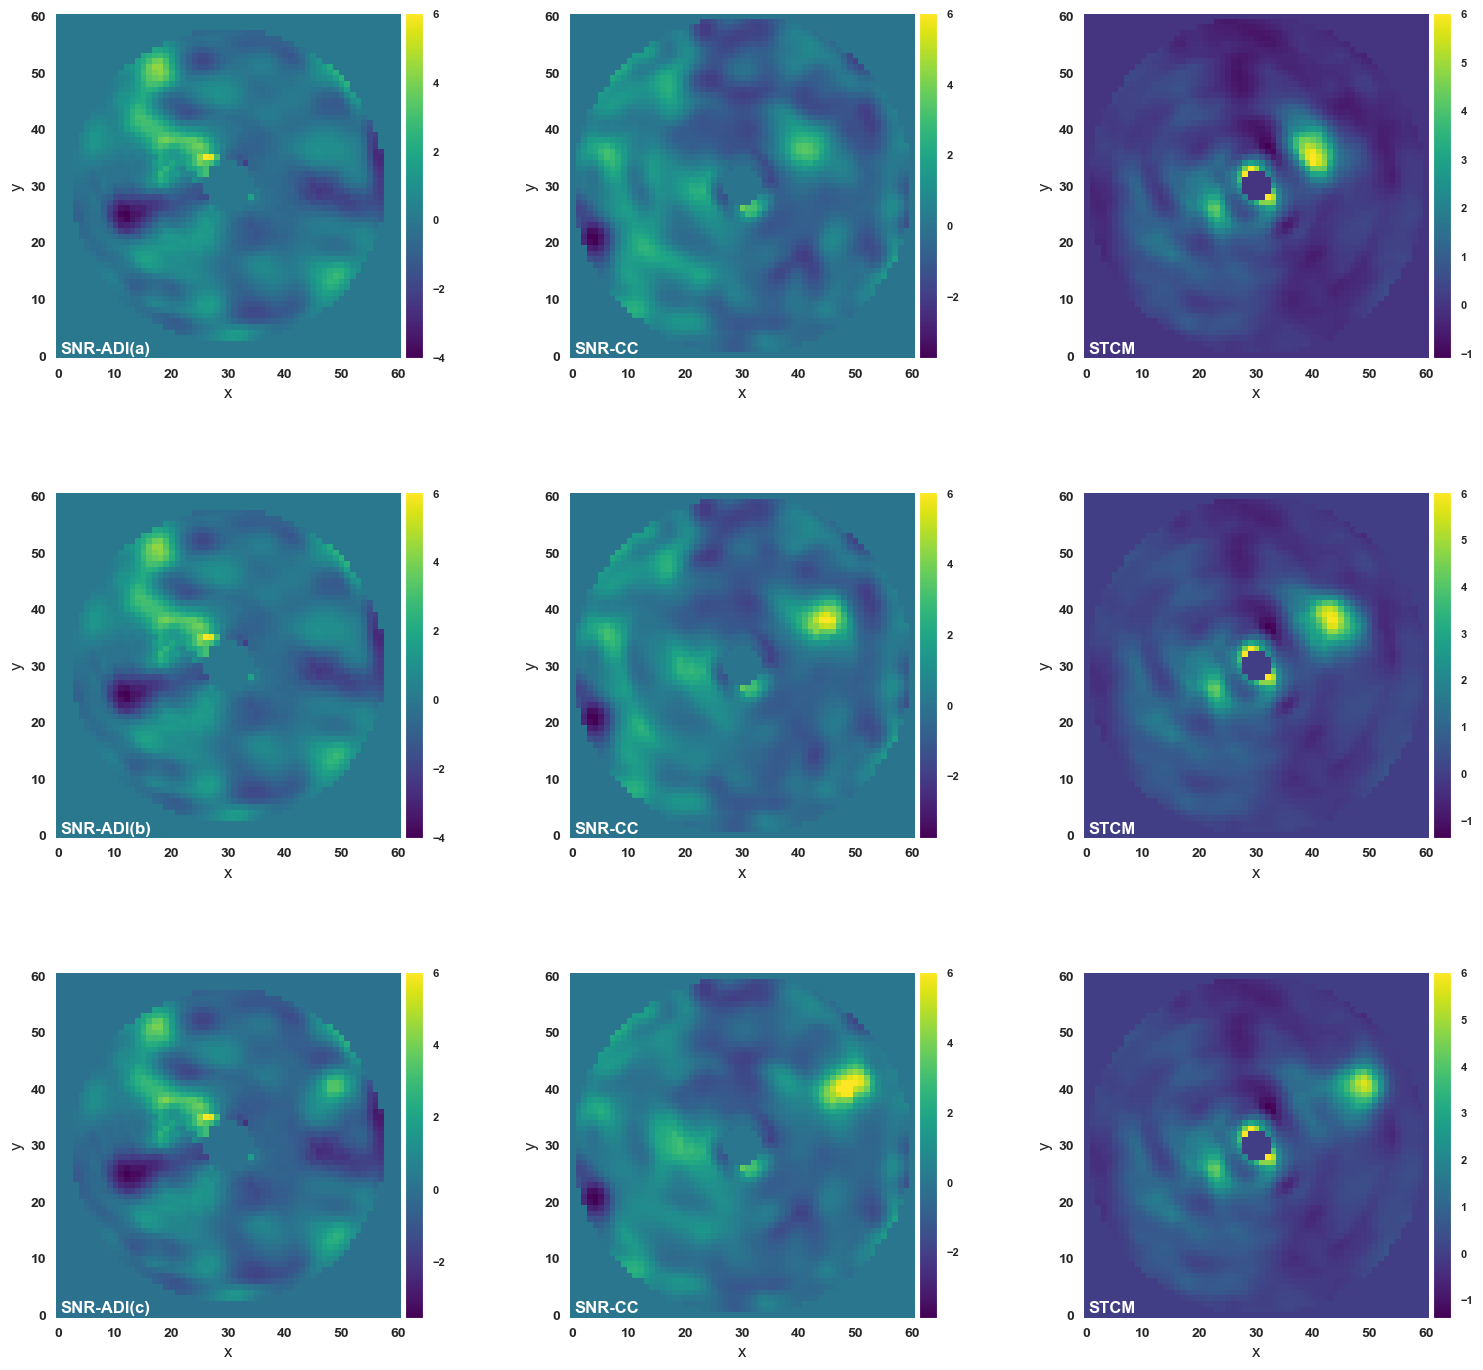

In [77]:
#f,ax = plt.subplots(2,1,sharex=True,sharey=True)
plot_frames(new_tup,
            rows = 3 ,ang_scale=False, ndec=2,ang_ticksep=9,log=False,
           label =('SNR-ADI(a)','SNR-CC','STCM',
                  'SNR-ADI(b)','SNR-CC','STCM',
                  'SNR-ADI(c)','SNR-CC','STCM'),
                #return_fig_ax = True,
           vmax=6)


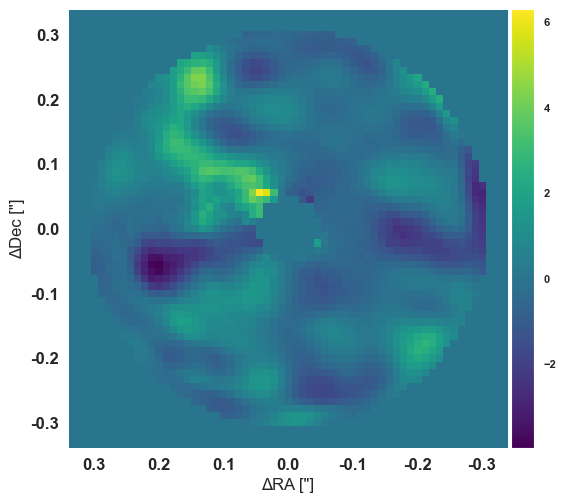

In [136]:
plot_frames(r1[1],ang_scale=True,ang_ticksep=9)

In [1580]:
len(r2)

4

In [116]:
plot_r1= np.copy(r1)
#plot_r2=np.copy(r2)
#plot_r3=np.copy(r3)

In [117]:
plot_r1[2]= snrmap(plot_r1[2],fwhm=2.5)
#plot_r2[2] = snrmap(plot_r2[2],fwhm=2.5)
#plot_r3[2] = snrmap(plot_r3[2],fwhm=2.5)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-09-10 15:56:18
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
S/N map created using 28 processes
Running time:  0:00:06.499809
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [118]:

plt_order = [plot_r1,plot_r2,plot_r3]

In [119]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str,y:float,bbox_props=None,fontsize=12):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold',y=y,bbox=bbox_props,fontsize=fontsize)
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

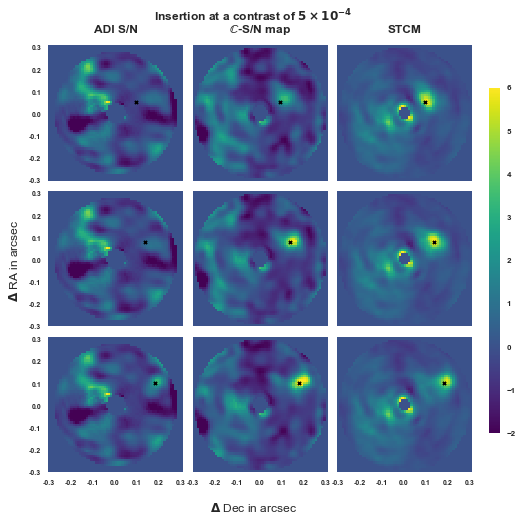

In [296]:
cb_titles=['S/N','$\mathcal{C}$-S/N','STC']

fig,ax = plt.subplots(3,3,sharex=True,sharey=True,figsize=(7.6,8))
for j in range(3):
    for i in range(3):
        im = ax[j][i].pcolormesh(plt_order[j][i+1],cmap='viridis',vmin=-2,vmax=6)
        ax[j][i].set_aspect('equal', 'box')
        #cb=plt.colorbar(im,ax=ax[j][i],fraction=0.046, pad=0.04,orientation='vertical')
        #cb.ax.set_title(cb_titles[i])
        #cb.ax.tick_params(labelsize=6)
        ax[j][i].set_xticks(np.arange(0,70,10))
        ax[j][i].set_yticks(np.arange(0,70,10))
        ax[j][i].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
        ax[j][i].set_yticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
        ax[j][i].scatter(arrow_tups[j][0],arrow_tups[j][1],marker='x',color='k',s=10)
cbar_ax = fig.add_axes([0.93, 0.2, 0.02, 0.6])
cb1=fig.colorbar(ax[0][0].collections[0], cax=cbar_ax,orientation='vertical')
cb1.ax.tick_params(labelsize=8)
    #ax.set(xlim=(0,60),ylim=(0,60))
#grid = plt.GridSpec(3, 3)
#create_subtitle(fig, grid[0 ,::], 'separation of $\\approx 2.3$ FWHM',y=0.95,fontsize=10)
#create_subtitle(fig, grid[1,::], 'separation of $\\approx 3.3$ FWHM',y=0.95,fontsize=10)
#create_subtitle(fig, grid[2,::], 'separation of $\\approx 4.3$ FWHM',y=0.95,fontsize=10)
ax[0][0].set_title('ADI S/N',fontweight='bold',y=1.05)
ax[0][1].set_title('$\mathbb{C}$-S/N map',fontweight='bold',y=1.05)
ax[0][2].set_title('STCM',fontweight='bold',y=1.05)
#fig.text(0.4,0.88,'Separation $\\approx 2.3$ FWHM',fontsize=9)
#fig.text(0.4,0.625,'Separation $\\approx 3.3$ FWHM',fontsize=9)
#fig.text(0.4,0.375,'Separation $\\approx 4.3$ FWHM',fontsize=9)
fig.suptitle("Insertion at a contrast of $5\\times10^{-4}$",fontweight='bold',fontsize=12,y=0.94)
fig.supxlabel("$\Delta$ Dec in arcsec",y=0.06)
fig.supylabel("$\Delta$ RA in arcsec",y=0.5,x=0.05)
fig.subplots_adjust(wspace=0.07,hspace=0.02)
fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/Fig1_Dec_highres_noinbetween.png",dpi=400)

In [1969]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

In [235]:
help(ax.set_xticklabels)

AttributeError: 'numpy.ndarray' object has no attribute 'set_xticklabels'

In [ ]:
r1[1::]

In [ ]:
help(plot_frames)

In [ ]:
import hciplot
hciplot.__version__

### Fig 3,4,5

In [6]:
prefix = "/mnt/disk12tb/Users/rakesh/SpatialDetection/Training_vel/Training/"
h1_patches = open_fits(prefix+"H1patches/H1_seq_training_cont_1e-03_rad_22.0_theta_120.00.fits")

Fits HDU-0 data successfully loaded. Data shape: (83, 20, 11, 11)


In [7]:
h0_patches = open_fits(prefix+"H0patches/initial_h0_fov11.fits")
                       

Fits HDU-0 data successfully loaded. Data shape: (270, 83, 20, 11, 11)


In [8]:
t1 = h1_patches[50,0::,:,:]
t2 =h0_patches[33,50,::,:,:]

In [9]:
t1.shape

(20, 11, 11)

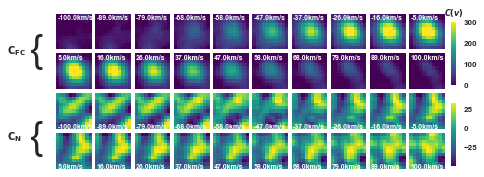

In [293]:
vels = np.linspace(-100,100,20)
fig, axs = plt.subplots(4,10,sharex=True,sharey=True,tight_layout=False,figsize=(8,8))

for j in range(0,2):
    for i in range(0,10):
        im= axs[j][i].pcolormesh(t1[i+(j*10)],cmap='viridis',vmin=0,vmax=300)
        axs[j][i].set_aspect('equal', 'box')
        #cb=plt.colorbar(im,ax=axs[j][i],fraction=0.046, pad=0.04,orientation='vertical')
        axs[j][i].set_xticks(np.arange(0,11,5))
        axs[j][i].set_yticks(np.arange(0,11,5))
        
        axs[j][i].set_xticklabels(["","",""],fontsize=10)
        axs[j][i].set_yticklabels(["","",""],fontsize=10)
        axs[j][i].text(0.3,9,str(np.round(vels[i+(j*10)],0))+"km/s",c='w',fontsize=7)
        #axs[j][i].subplots.subplots_adjust(hspace=0.0)
#cb=plt.colorbar(im,ax=axs[0][-1],orientation='vertical')
cbar_ax = fig.add_axes([0.81, 0.51, 0.01, 0.11])
#fig.colorbar(im, cax=cbar_ax)
#im = collections[0]
cb1=fig.colorbar(axs[0][9].collections[0], cax=cbar_ax,orientation='vertical')
cb1.ax.tick_params(labelsize=8)
cb1.ax.set_title("$C(v)$",fontsize=8,y=0.998)
for j in range(2,4):
    for i in range(0,10):
        im = axs[j][i].pcolormesh(t2[i+9*(j-2)],cmap ='viridis')
        axs[j][i].set_aspect('equal', 'box')
        axs[j][i].text(0.3,0.01,str(np.round(vels[i+((j-2)*10)],0))+"km/s",c='w',fontsize=7)
#draw_brace(axs[0][0],10,[-1,-1],'H1',text_pos=[-3,-2],rotate=True)
#draw_brace(axs[2][0],10,[-1,-1],'H0',text_pos=[-3,-2],rotate=True)
cbar_ax2 = fig.add_axes([0.81, 0.37, 0.01, 0.11])
cb2=fig.colorbar(axs[2][9].collections[0], cax=cbar_ax2,orientation='vertical')
cb2.ax.tick_params(labelsize=8)

fig.text(0.08,0.55,"{",fontsize=40,fontweight='normal')
fig.text(0.04,0.565,"$\\rm{C_{FC}}$",fontsize=10,fontweight='normal')
fig.text(0.08,0.40,"{",fontsize=40,fontweight='normal')
fig.text(0.04,0.415,"$\\rm{C_{N}}$",fontsize=10,fontweight='normal')
fig.subplots_adjust(wspace=0.1,top=0.95,bottom=0.05,hspace=-0.9,right=0.8)
fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/fig_2_dec2023_aligned.png",dpi=400)

In [290]:
help(cb1.ax.set_title)

Help on method set_title in module matplotlib.axes._axes:

set_title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Set a title for the Axes.
    
    Set one of the three available Axes titles. The available titles
    are positioned above the Axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'color': rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
        Which title to set.
    
    y : float, default: :rc:`axes.ti

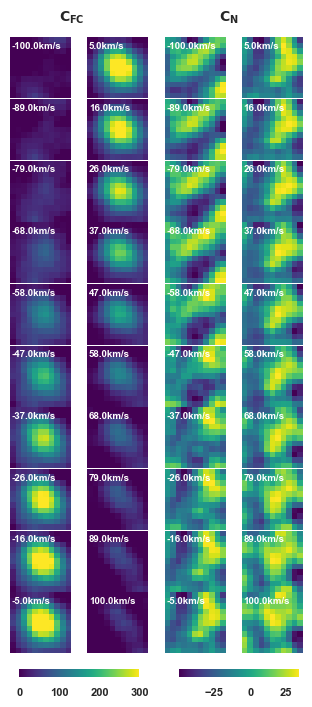

In [1858]:
vels = np.linspace(-100,100,20)
fig, axs = plt.subplots(10,4,sharex=True,sharey=True,tight_layout=False,figsize=(4,8))

for j in range(0,2):
    for i in range(0,10):
        im= axs[i][j].pcolormesh(t1[i+(j*10)],cmap='viridis',vmin=0,vmax=300)
        axs[i][j].set_aspect('equal', 'box')
        #cb=plt.colorbar(im,ax=axs[j][i],fraction=0.046, pad=0.04,orientation='vertical')
        axs[i][j].set_xticks(np.arange(0,11,5))
        axs[i][j].set_yticks(np.arange(0,11,5))
        
        axs[i][j].set_xticklabels(["","",""],fontsize=10)
        axs[i][j].set_yticklabels(["","",""],fontsize=10)
        axs[i][j].text(0.3,9,str(np.round(vels[i+(j*10)],0))+"km/s",c='w',fontsize=7)
        #axs[j][i].subplots.subplots_adjust(hspace=0.0)
#cb=plt.colorbar(im,ax=axs[0][-1],orientation='vertical')
cbar_ax = fig.add_axes([0.17, 0.08, 0.3, 0.01])
#fig.colorbar(im, cax=cbar_ax)
#im = collections[0]
cb1=fig.colorbar(axs[9][0].collections[0], cax=cbar_ax,orientation='horizontal')
cb1.ax.tick_params(labelsize=8)
for j in range(2,4):
    for i in range(0,10):
        im = axs[i][j].pcolormesh(t2[i+9*(j-2)],cmap ='viridis')
        axs[i][j].set_aspect('equal', 'box')
        axs[i][j].text(0.3,9,str(np.round(vels[i+((j-2)*10)],0))+"km/s",c='w',fontsize=7)
#draw_brace(axs[0][0],10,[-1,-1],'H1',text_pos=[-3,-2],rotate=True)
#draw_brace(axs[2][0],10,[-1,-1],'H0',text_pos=[-3,-2],rotate=True)
cbar_ax2 = fig.add_axes([0.57, 0.08, 0.3, 0.01])
cb2=fig.colorbar(axs[9][2].collections[0], cax=cbar_ax2,orientation='horizontal')
cb2.ax.tick_params(labelsize=8)

f#ig.text(0.08,0.55,"{",fontsize=40,fontweight='normal')
fig.text(0.27,0.9,"$\\rm{C_{FC}}$",fontsize=10,fontweight='normal')
#fig.text(0.08,0.40,"{",fontsize=40,fontweight='normal')
fig.text(0.67,0.9,"$\\rm{C_{N}}$",fontsize=10,fontweight='normal')
fig.subplots_adjust(wspace=-0.01,hspace=0.01)
fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/fig_2_feb_vert.png",dpi=300)

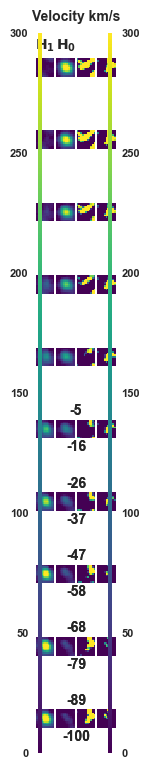

In [1815]:
vels = np.linspace(-100,100,20)
fig, axs = plt.subplots(10,4,sharex=True,sharey=True,figsize=(8,8))
ylocs=np.linspace(0.07,0.93,20)
for j in range(10):
    for i in range(0,2):
        im_h1= axs[j][i].pcolormesh(t1[j+(i*10)],cmap='viridis',vmin=0,vmax=300)
        axs[j][i].set_aspect('equal', 'box')
        #cb=plt.colorbar(im,ax=axs[j][i],fraction=0.046, pad=0.04,orientation='vertical')
        axs[j][i].set_xticks(np.arange(0,11,5))
        axs[j][i].set_yticks(np.arange(0,11,5))

        axs[j][i].set_xticklabels(["","",""],fontsize=10)
        axs[j][i].set_yticklabels(["","",""],fontsize=10)
        #axs[j][0].text(0.3,9,str(np.round(vels[j],0))+"km/s",c='w',fontsize=7)
for j in range(10):
    for i in range(2,4):
        im_h0 = axs[j][i].pcolormesh(t2[j+((i-2)*10)],cmap ='viridis',vmin=0,vmax=10)
        axs[j][i].set_aspect('equal', 'box')
        fig.text(0.1,ylocs[j],'{0:1.0f}'.format(vels[j]),fontsize=10,ha='center',va='center')
fig.text(0.1,0.97,'Velocity km/s',ha='center',va='center')
axs[0][0].set_title("$\\rm{H_1}$",fontsize=10)
axs[0][1].set_title('$\\rm{H_0}$',fontsize=10)
cbar_ax = fig.add_axes([0.053, 0.05, 0.005, 0.9])
cb1=fig.colorbar(axs[9][0].collections[0], cax=cbar_ax,orientation='vertical')
cb1.ax.tick_params(labelsize=8)
cb1.ax.yaxis.set_ticks_position('left')
#cb1.ax.set_title("CC")

cbar_ax2 = fig.add_axes([0.14, 0.05, 0.005, 0.9])
cb2=fig.colorbar(axs[9][1].collections[0], cax=cbar_ax2,orientation='vertical')
cb2.ax.tick_params(labelsize=8)
#cb2.ax.set_xticklabels(rotation=180)

#fig.text(0.08,0.55,"{",fontsize=40,fontweight='normal')
#fig.text(0.05,0.57,"$\\rm{H_{1}}$",fontsize=10,fontweight='normal')
#fig.text(0.08,0.40,"{",fontsize=40,fontweight='normal')
#fig.text(0.05,0.42,"$\\rm{H_{0}}$",fontsize=10,fontweight='normal')
fig.subplots_adjust(left=0.05,top=0.95,bottom=0.05,hspace=0.05,right=0.15,wspace=0.1)
#fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/fig2_vert.png",dpi=300)

### Fig 6, 7, 8

In [6]:
filename = "fitsfiles_vel/cnn_detmap_5e-04_21.0_180.00.fits"
detmap_cnn = open_fits(filename)#[5:55,5:55]
filename_sodinn = "fitsfiles_vel/sodinn_detmap_5e-04_21.0_180.00.fits"
detmap_sodinn = open_fits(filename_sodinn)#[5:55,5:55]
filename_stim = "fitsfiles/stim_detmap_5e-04_21.0_180.00.fits"
detmap_stim = open_fits(filename_stim)#[5:55,0:55]
filename_rf = "fitsfiles_vel/rf_detmap_5e-04_21.0_180.00.fits"
detmap_rf = open_fits(filename_rf)#[5:55,0:55]
rad = float(filename.split('/')[-1].split('_')[3])
theta = float(filename.split('/')[-1].split('_')[4].split('.')[0])
cont = float(filename.split('/')[-1].split('_')[2])
y_pos = frame_center(detmap_cnn)[0]+rad*np.sin(np.deg2rad(theta))
x_pos = frame_center(detmap_cnn)[0] +rad*np.cos(np.deg2rad(theta))
#detmap_cnn = 

Fits HDU-0 data successfully loaded. Data shape: (61, 61)
Fits HDU-0 data successfully loaded. Data shape: (61, 61)
Fits HDU-0 data successfully loaded. Data shape: (61, 61)
Fits HDU-0 data successfully loaded. Data shape: (61, 61)


In [7]:
try:
    thresh_cnn = np.linspace(0.09,0.9999,10)
    res_cnn =compute_binary_map(detmap_cnn,
                            thresholds = thresh_cnn,fwhm=4.8,injections=(y_pos,x_pos),npix=2,
                            overlap_threshold=0.5,
                            max_blob_fact=3)
except AttributeError:
    thresh_cnn = np.linspace(0.01,0.95,10)
    res_cnn =compute_binary_map(detmap_cnn,
                            thresholds=thresh_cnn,fwhm=4.8,injections=(y_pos,x_pos),npix=2,
                            overlap_threshold=0.5,
                            max_blob_fact=1)
try:
    res_sodinn = compute_binary_map(detmap_sodinn, 
                                    thresholds=np.linspace(0.09,0.99,10),fwhm=4.8,injections=(y_pos,x_pos),
                                    npix=2)
except AttributeError:
    res_sodinn = compute_binary_map(detmap_sodinn, 
                                    thresholds=np.linspace(0.09,0.95,10),fwhm=4.8,injections=(y_pos,x_pos),
                                    npix=2)
try:
    thresh_rf=np.linspace(0.01,0.99,10)
    res_rf = compute_binary_map(detmap_rf, 
                                    thresholds=thresh_rf,fwhm=4.8,injections=(y_pos,x_pos),
                                    npix=2)
except AttributeError:
    thresh_rf=np.linspace(0.01,0.7,10)
    res_rf = compute_binary_map(detmap_rf, 
                                    thresholds=thresh_rf,fwhm=4.8,injections=(y_pos,x_pos),
                                    npix=2)

In [8]:
thresh_stim =np.linspace(1.3,6.0,10)
res_stim = compute_binary_map(detmap_stim,thresholds=thresh_stim,
                              fwhm=4.8,injections=(y_pos,x_pos),npix=1,
                             max_blob_fact=4)

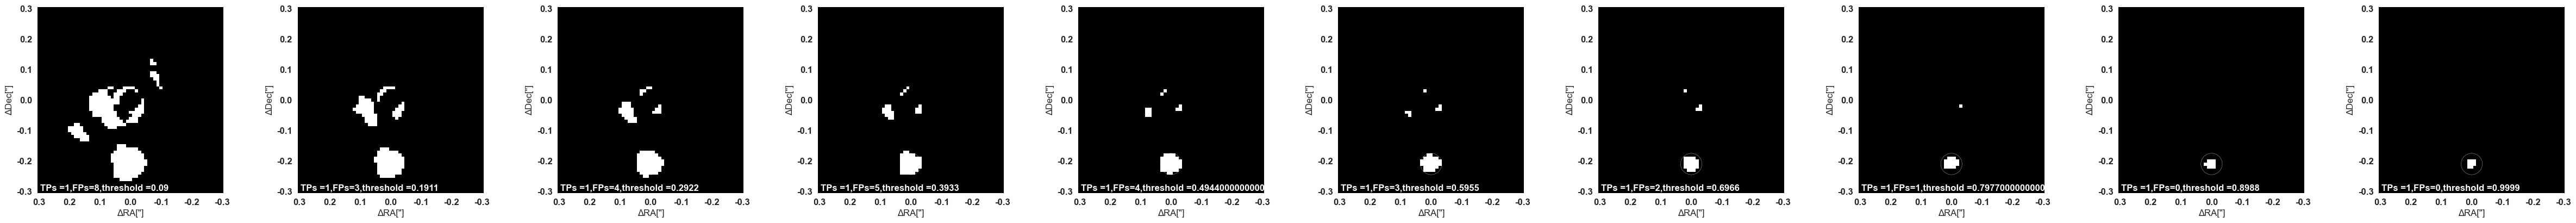

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [8, 3, 4, 5, 4, 3, 2, 1, 0, 0]


In [9]:
obj = res_stim
labs = tuple(["TPs ={0},FPs={1},threshold ={2}".format(o1,o2,o3) for o1,o2,o3 in zip(obj[0],obj[1],thresh_cnn)])
plot_frames(tuple(obj[2]),rows=1,
            ang_scale=True,ang_ticksep=10,circle=(y_pos,x_pos),circle_radius=3.5,
            cmap='gray',
           label=labs,
           colorbar=False)
print(obj[0],obj[1])

In [10]:

detmaps = [detmap_stim,detmap_cnn,detmap_sodinn]

In [11]:
from matplotlib import colors
pmaps=[]
tps=[]
fps=[]
ths=[]
for i in [3,5,7,9]:
    val = obj[2][i]
    tps.append(obj[0][i])
    fps.append(obj[1][i])
    ths.append(thresh_stim[i])
    #posns=(np.unravel_index(np.where(obj[2][1]),obj[2][1].shape))
    #print(obj[1])
    #all_pos=[]

    masked = mask_circle(val,cy=x_pos,cx=y_pos,radius=7,fillwith=False)
    #plt.pcolormesh(masked,cmap='Reds')
    #plt.pcolormesh(val,cmap='viridis')
    #val[masked] = -1
    pmap=np.ones(val.shape)*-1
    #pmap =
    pmap[val] = 1
    pmap[masked] = 0
    #pmap[pmap==0]=np.nan
    custom_cmap = colors.ListedColormap(['black','red','green'])
    pmaps.append(pmap)
#plt.pcolormesh(pmap,cmap =custom_cmap)
#plot_frames(pmap,cmap=custom_cmap)
#plt.colorbar()
 #plt.scatter(all_pos[int(i)][1],all_pos[int(i)][0],marker='o',c='k')

In [12]:
pmaps_cnn=[]
tps_cnn=[]
fps_cnn=[]
ths_cnn=[]
for i in [3,5,7,9]:
    val = res_cnn[2][i]
    tps_cnn.append(res_cnn[0][i])
    fps_cnn.append(res_cnn[1][i])
    ths_cnn.append(thresh_cnn[i])
    #posns=(np.unravel_index(np.where(obj[2][1]),obj[2][1].shape))
    #print(obj[1])
    #all_pos=[]

    masked = mask_circle(val,cy=x_pos,cx=y_pos,radius=8,fillwith=False)
    #plt.pcolormesh(masked,cmap='Reds')
    #plt.pcolormesh(val,cmap='viridis')
    #val[masked] = -1
    pmap=np.ones(val.shape)*-1
    #pmap =
    pmap[val] = 1
    pmap[masked] = 0
    #pmap[pmap==0]=np.nan
    custom_cmap = colors.ListedColormap(['black','red','green'])
    pmaps_cnn.append(pmap)

In [13]:
pmaps_sodinn=[]
tps_sodinn=[]
fps_sodinn=[]
ths_sodinn=[]
for i in [3,5,7,9]:
    val = res_sodinn[2][i]
    tps_sodinn.append(res_sodinn[0][i])
    fps_sodinn.append(res_sodinn[1][i])
    ths_sodinn.append(thresh_cnn[i])
    #posns=(np.unravel_index(np.where(obj[2][1]),obj[2][1].shape))
    #print(obj[1])
    #all_pos=[]

    masked = mask_circle(val,cy=x_pos,cx=y_pos,radius=7,fillwith=False)
    #plt.pcolormesh(masked,cmap='Reds')
    #plt.pcolormesh(val,cmap='viridis')
    #val[masked] = -1
    pmap=np.ones(val.shape)*-1
    #pmap =
    pmap[val] = 1
    pmap[masked] = 0
    #pmap[pmap==0]=np.nan
    custom_cmap = colors.ListedColormap(['black','red','green'])
    pmaps_sodinn.append(pmap)

In [1499]:
thresh_cnn

array([0.09  , 0.1911, 0.2922, 0.3933, 0.4944, 0.5955, 0.6966, 0.7977,
       0.8988, 0.9999])

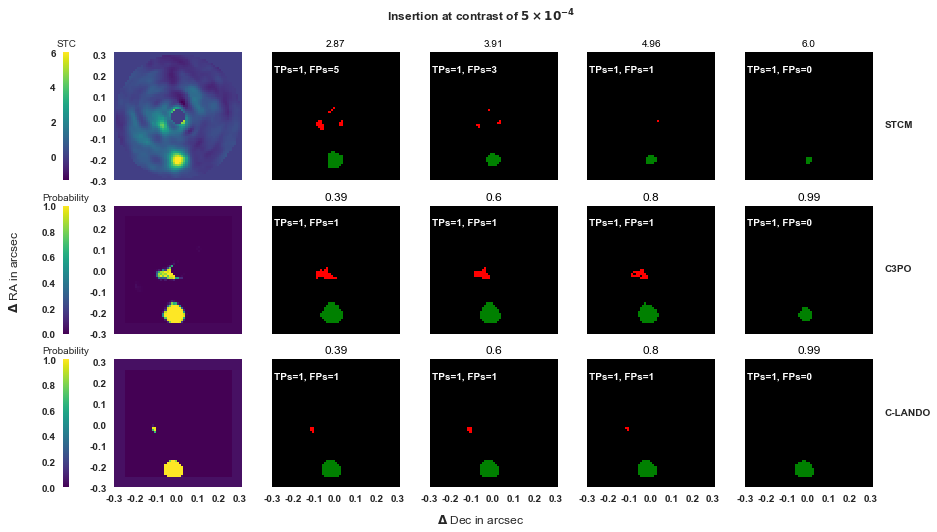

In [26]:
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
fig,axs = plt.subplots(3,len(pmaps)+1,sharey=True,sharex=True,figsize=(14,8))
#grid = plt.GridSpec(3, len(pmaps)+1)
bbox_props = dict(boxstyle="Round", fc="salmon", ec='k', alpha=0.4,pad=0.0001,x=0.01)
cb_titles =['STC','Probability','Probability']
#create_subtitle(fig, grid[0 ,::], 'Thresholded maps',y=0.95,fontsize=16)
#create_subtitle(fig, grid[0 ,::], 'STCM',y=0.85,fontsize=14)
#create_subtitle(fig, grid[1,::], 'C3PO',y=0.83, fontsize=14)
#create_subtitle(fig, grid[2,::], 'C-LANDO',y=0.83,fontsize=14)
#create_subtitle(fig, grid[0,0],'Detection maps',y=0.95,fontsize=16)
for i in range(3):
    if(i==0):
        vmax=6
        #vmin = 0
    else:
        vmax=1.0
    im = axs[i][0].pcolormesh(detmaps[i],cmap='viridis',vmax=vmax)#,vmin=vmin)
    axs[i][0].set_aspect('equal','box')
    axs[i][0].set_xticks(np.arange(0,70,10))
    axs[i][0].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=10)
    axs[i][0].set_yticks(np.arange(0,70,10))
    axs[i][0].set_yticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=10)
    axs[i][0].tick_params(axis='y', which='both', labelleft=True, labelright=False)
   # axs[i][0]= divider.new_vertical(size = '100%', pad = 0.1)
    cbaxes = axs[i][0].inset_axes([-0.4, 0.0, 0.05,1.0])
    cb = plt.colorbar(im,ax=axs[i][0],fraction=0.046, pad=0.01,cax=cbaxes,orientation='vertical')
    cb.ax.yaxis.set_ticks_position('left')
    cb.ax.tick_params(labelsize=10)
    
    cb.ax.set_title(cb_titles[i],fontsize=10)
    #cb.ax.set_xticks(fontsize=8)
    #cb.ax.set_yticklabels(["{:.1}".format(i) for i in cb.get_ticks()],fontsize=8)
legend_elements =[Line2D([0], [0], marker='o', color='k', label='FP',markerfacecolor='red'),
                         Line2D([0], [0], marker='o', color='k', label='TP',markerfacecolor='green')]
#fig.legend(handles=legend_elements)
for k in range(1,len(pmaps)+1):
    i=k-1
    if(tps[i]==0):
        cmap=colors.ListedColormap(['black','red'])
    else:
        cmap=custom_cmap
    axs[0][k].pcolormesh(pmaps[i],cmap=cmap)
    axs[0][k].set_aspect('equal','box')
    axs[0][k].text(1,52,"TPs={0}, FPs={1}".format(tps[i],fps[i]),c='w',fontsize=10)
    #create_subtitle(fig, grid[0,k],'Threshold = {0:.1f}'.format(np.round(ths[i],1)),y=0.83)
    axs[0][k].set_xticks(np.arange(0,70,10))
    axs[0][k].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=10)
    axs[0][k].set_yticks(np.arange(0,70,10))
    axs[0][k].set_yticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=10)
    axs[0][k].set_title("{0}".format(np.round(ths[i],2)),c='k',fontsize=10)
    axs[1][k].pcolormesh(pmaps_cnn[i],cmap=custom_cmap)
    axs[1][k].set_aspect('equal','box')
    axs[1][k].text(1,52,"TPs={0}, FPs={1}".format(tps_cnn[i],fps_cnn[i]),c='w',fontsize=10)
    #create_subtitle(fig, grid[1,k],'Threshold = {0:0.1f}'.format(np.round(ths_cnn[i],3)),y=0.83)
    axs[1][k].set_xticks(np.arange(0,70,10))
    axs[1][k].set_yticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=10)
    #axs[1][k].t(1,52,"Threshold={0}".format(np.round(ths_cnn[i],2)),c='k')
    ths_cnn[-1] =0.99
    axs[1][k].set_title("{0}".format(np.round(ths_cnn[i],2)),c='k',fontsize=12)
    axs[2][k].pcolormesh(pmaps_sodinn[i],cmap=custom_cmap)
    axs[2][k].set_aspect('equal','box')
    axs[2][k].text(1,52,"TPs={0}, FPs={1}".format(tps_sodinn[i],fps_sodinn[i]),c='w',fontsize=10)
    axs[2][k].set_title("{0}".format(np.round(ths_cnn[i],2)),c='k',fontsize=12)

    #create_subtitle(fig, grid[2,k],'Threshold = {0:0.1f}'.format(np.round(ths_cnn[i],3)),y=0.83)
    axs[2][k].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=10)
    #axs[2][k].text(1,52,"Threshold={0}".format(np.round(ths_cnn[i],2)),c='w')
fig.text(0.9,0.75,'STCM')
fig.text(0.9,0.5,'C3PO')
fig.text(0.9,0.25,'C-LANDO')
#l=axs[0][1].legend(handles=legend_elements,loc='out')
#for text in l.get_texts():
 #   text.set_color("white")
fig.suptitle("Insertion at contrast of $5\\times10^{-4}$",fontweight='bold',fontsize=12,y=0.96)
fig.supxlabel("$\Delta$ Dec in arcsec",y=0.06)
fig.supylabel("$\Delta$ RA in arcsec",y=0.5,x=0.03)
plt.subplots_adjust(hspace=0.2,wspace=0.05)
fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/Fig3_Mar2024_referee.png",dpi=400)#https://vip.readthedocs.io/en/latest/_modules/vip_hci/metrics/roc.html?highlight=compute_binary_map#

In [157]:
i

3

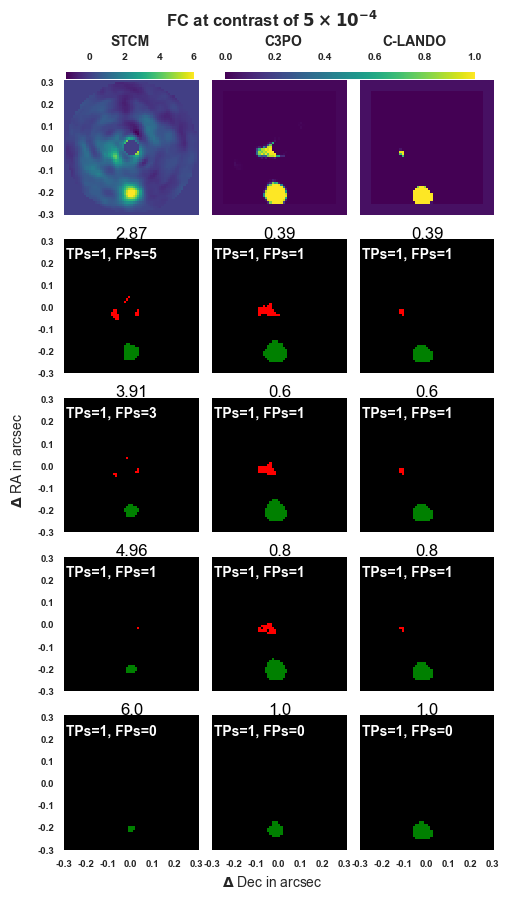

In [1955]:
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
fig,axs = plt.subplots(len(pmaps)+1,3,sharey=True,sharex=True,figsize=(5.7,10.0))
#grid = plt.GridSpec(3, len(pmaps)+1)
bbox_props = dict(boxstyle="Round", fc="salmon", ec='k', alpha=0.4,pad=0.0001,x=0.01)
cb_titles =['STC','Probability','Probability']
#create_subtitle(fig, grid[0 ,::], 'Thresholded maps',y=0.95,fontsize=16)
#create_subtitle(fig, grid[0 ,::], 'STCM',y=0.85,fontsize=14)
#create_subtitle(fig, grid[1,::], 'C3PO',y=0.83, fontsize=14)
#create_subtitle(fig, grid[2,::], 'C-LANDO',y=0.83,fontsize=14)
#create_subtitle(fig, grid[0,0],'Detection maps',y=0.95,fontsize=16)
vmaxs=[6.0,1.0,1.0]
for i in range(3):
    
    im = axs[0][i].pcolormesh(detmaps[i],cmap='viridis',vmax=vmaxs[i])
    axs[0][i].set_aspect('equal','box')
    if(i==0):
        axs[0][i].set_xticks(np.arange(0,70,10))
        axs[0][i].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
        axs[0][i].set_yticks(np.arange(0,70,10))
        axs[0][i].set_yticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
        axs[0][i].tick_params(axis='y', which='both', labelleft=True, labelright=False)
   # axs[i][0]= divider.new_vertical(size = '100%', pad = 0.1)
cbaxes = axs[0][0].inset_axes([0.013, 1.01,0.95,0.05])
cb = plt.colorbar(axs[0][0].collections[0],ax=axs[0][0],fraction=0.046, pad=0.08,cax=cbaxes,orientation ='horizontal')
cb.ax.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=7.5)

cbaxes = axs[0][1].inset_axes([0.05*(1+1), 1.01,1.85,0.05])
cb = plt.colorbar(axs[0][1].collections[0],ax=axs[0][1],fraction=0.046, pad=0.08,cax=cbaxes,orientation ='horizontal')
cb.ax.xaxis.set_ticks_position('top')
cb.ax.tick_params(labelsize=7.5)
    
    #cb.ax.set_title(cb_titles[i],fontsize=8)
    #cb.ax.set_xticks(fontsize=8)
    #cb.ax.set_yticklabels(["{:.1}".format(i) for i in cb.get_ticks()],fontsize=8)
fig.text(0.25,0.918,'STCM',va='center',ha='center')
fig.text(0.52,0.918,'C3PO',va='center',ha='center')
fig.text(0.75,0.918,'C-LANDO',va='center',ha='center')
legend_elements =[Line2D([0], [0], marker='o', color='k', label='FP',markerfacecolor='red'),
                         Line2D([0], [0], marker='o', color='k', label='TP',markerfacecolor='green')]
#fig.legend(handles=legend_elements)
for k in range(1,len(pmaps)+1):
    i=k-1
    if(tps[i]==0):
        cmap=colors.ListedColormap(['black','red'])
    else:
        cmap=custom_cmap
    axs[k][0].pcolormesh(pmaps[i],cmap=cmap)
    axs[k][0].set_aspect('equal','box')
    axs[k][0].text(1,52,"TPs={0}, FPs={1}".format(tps[i],fps[i]),c='w')
    #create_subtitle(fig, grid[0,k],'Threshold = {0:.1f}'.format(np.round(ths[i],1)),y=0.83)
    axs[k][0].set_xticks(np.arange(0,70,10))
    axs[k][0].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
    axs[k][0].set_yticks(np.arange(0,70,10))
    axs[k][0].set_yticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
    axs[k][0].set_title("{0}".format(np.round(ths[i],2)),c='k',y=0.94)
    axs[k][1].pcolormesh(pmaps_cnn[i],cmap=custom_cmap)
    axs[k][1].set_aspect('equal','box')
    axs[k][1].text(1,52,"TPs={0}, FPs={1}".format(tps_cnn[i],fps_cnn[i]),c='w')
    #create_subtitle(fig, grid[1,k],'Threshold = {0:0.1f}'.format(np.round(ths_cnn[i],3)),y=0.83)
    axs[k][1].set_xticks(np.arange(0,70,10))
    axs[k][1].set_yticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
    axs[k][1].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
    #axs[1][k].t(1,52,"Threshold={0}".format(np.round(ths_cnn[i],2)),c='k')
    axs[k][1].set_title("{0}".format(np.round(ths_cnn[i],2)),c='k',y=0.94)
    axs[k][2].pcolormesh(pmaps_sodinn[i],cmap=custom_cmap)
    axs[k][2].set_aspect('equal','box')
    axs[k][2].text(1,52,"TPs={0}, FPs={1}".format(tps_sodinn[i],fps_sodinn[i]),c='w')
    #create_subtitle(fig, grid[2,k],'Threshold = {0:0.1f}'.format(np.round(ths_cnn[i],3)),y=0.83)
    axs[k][2].set_xticklabels(np.round(np.arange(-0.3,0.4,0.1),1),fontsize=7)
    axs[k][2].set_title("{0}".format(np.round(ths_sodinn[i],2)),c='k',y=0.94)
    #axs[2][k].text(1,52,"Threshold={0}".format(np.round(ths_cnn[i],2)),c='w')
#fig.text(0.95,0.37,'STCtMs ')

#l=axs[0][1].legend(handles=legend_elements,loc='out')
for text in l.get_texts():
    text.set_color("white")
fig.suptitle("FC at contrast of $5\\times10^{-4}$",fontweight='bold',fontsize=12,y=0.95)
fig.supxlabel("$\Delta$ Dec in arcsec",y=0.07,fontsize=10)
fig.supylabel("$\Delta$ RA in arcsec",y=0.5,x=0.04,fontsize=10)
plt.subplots_adjust(hspace=0.18,wspace=0.01)
fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/Fig3_feb_vert.png",dpi=400)

# Fig 9 and 10

## Checking for merging

In [122]:
filename = "fitsfiles_newnovel/v0/detmap_cnn_3e-04_19.0_60.00.fits"
detmap_cnn = open_fits(filename)#[5:55,5:55]
filename_sodinn = "fitsfiles_newnovel/v0/detmap_sodinn_3e-04_19.0_60.00.fits"
detmap_sodinn = open_fits(filename_sodinn)#[5:55,5:55]
rad = float(filename.split('/')[-1].split('_')[3])
theta = float(filename.split('/')[-1].split('_')[4].split('.')[0])
cont = float(filename.split('/')[-1].split('_')[2])
y_pos = frame_center(detmap_cnn)[0]+rad*np.sin(np.deg2rad(theta))
x_pos = frame_center(detmap_cnn)[0] +rad*np.cos(np.deg2rad(theta))

Fits HDU-0 data successfully loaded. Data shape: (61, 61)
Fits HDU-0 data successfully loaded. Data shape: (61, 61)


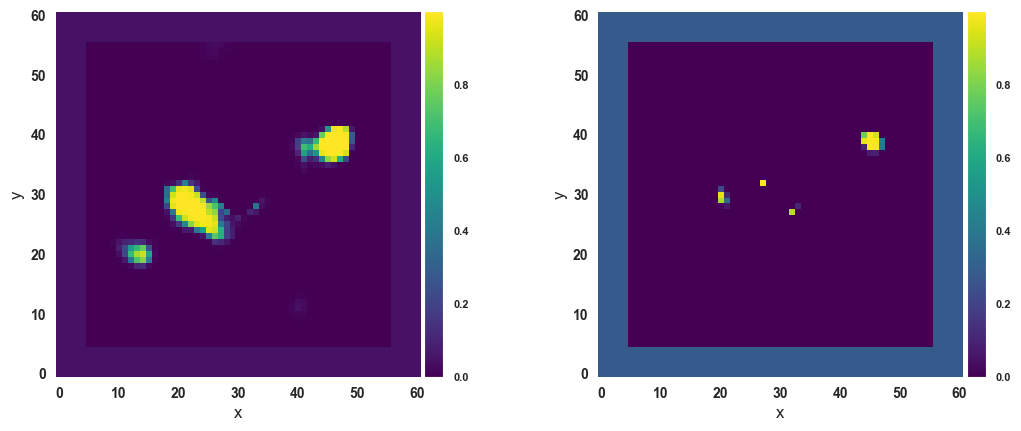

In [123]:
plot_frames((detmap_cnn,detmap_sodinn))

In [127]:
detmap_sodinn[0:6,56:60] =0

In [124]:
#only for the old data
detmap_sodinn[0:6,:] =0
detmap_sodinn[56:60,:]=0
detmap_sodinn[:,0:6]=0
detmap_sodinn[:,56:60] =0
#detmap_sodinn[55:60,0:5]=0
#detmap_sodinn[55:60,55:60]=0

In [128]:
try:
    thresh_cnn = np.linspace(0.09,0.9999,10)
    res_cnn =compute_binary_map(mask_circle(detmap_cnn,3.5),
                            thresholds = thresh_cnn,fwhm=4.8,injections=(y_pos,x_pos),npix=2,
                            overlap_threshold=0.5,
                            max_blob_fact=3)
except AttributeError:
    thresh_cnn = np.linspace(0.1,0.95,10)
    res_cnn =compute_binary_map(detmap_cnn,
                            thresholds=thresh_cnn,fwhm=4.8,injections=(y_pos,x_pos),npix=2,
                            overlap_threshold=0.5,
                            max_blob_fact=1)
detmap_sodinn = detmap_sodinn#[5:56,5:56]
y_pos = frame_center(detmap_sodinn)[0]+rad*np.sin(np.deg2rad(theta))
x_pos = frame_center(detmap_sodinn)[0] +rad*np.cos(np.deg2rad(theta))
try:
    res_sodinn = compute_binary_map(detmap_sodinn, 
                                    thresholds=np.linspace(0.09,0.9999,10),fwhm=4.8,injections=(y_pos,x_pos),
                                    npix=2)
except AttributeError:
    res_sodinn = compute_binary_map(detmap_sodinn, 
                                    thresholds=np.linspace(0.09,0.85,10),fwhm=4.8,injections=(y_pos,x_pos),
                                    npix=2)

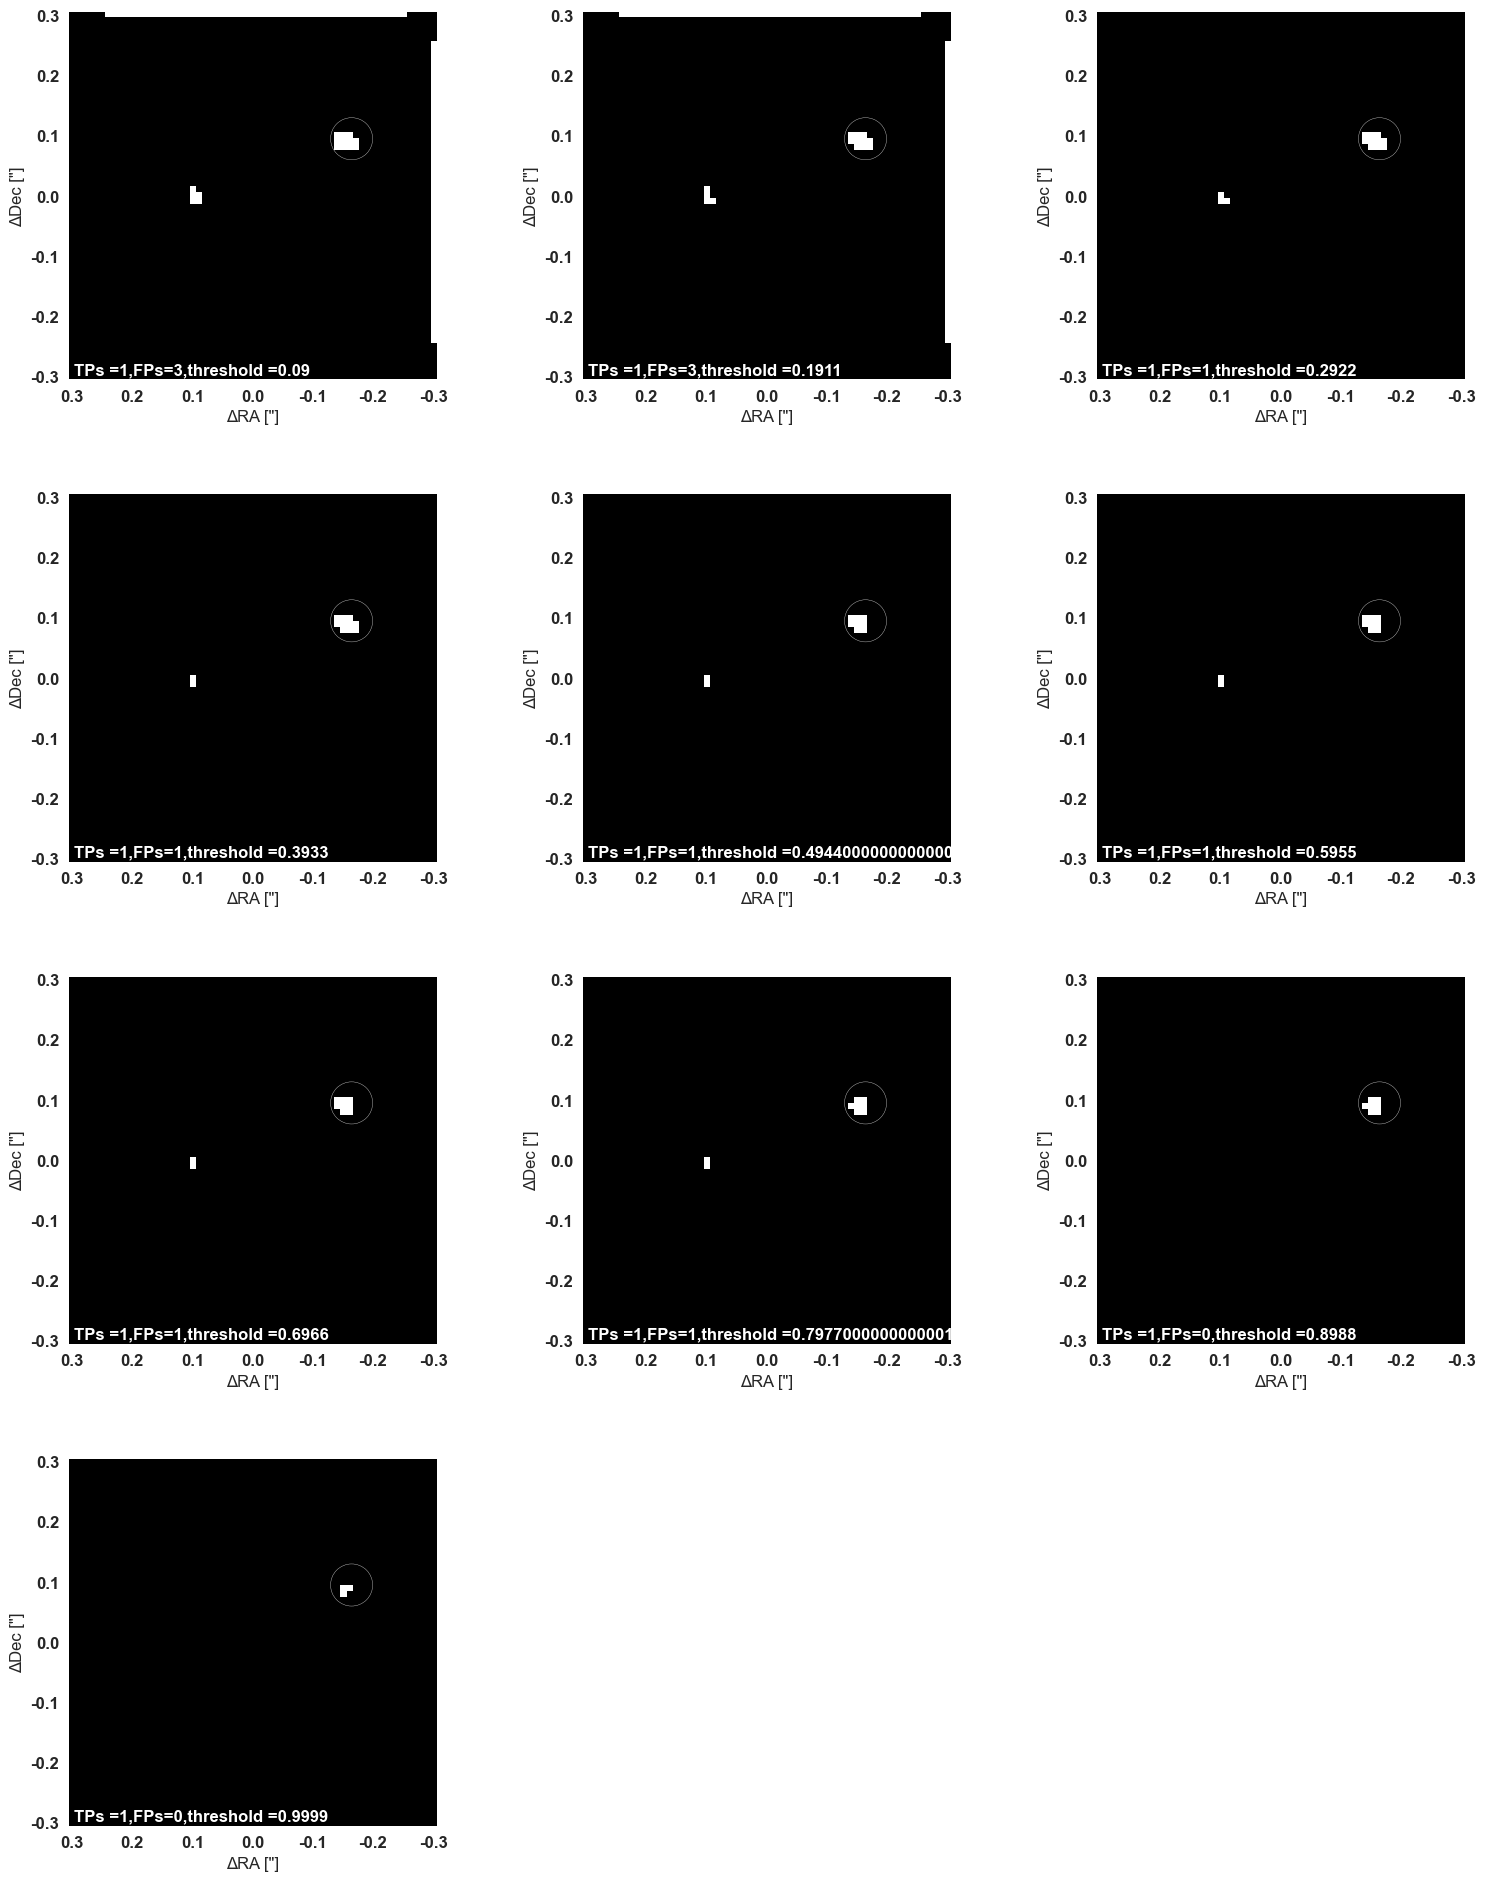

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1] [3, 3, 1, 1, 1, 1, 1, 1, 0, 0]


In [129]:
obj = res_sodinn
labs = tuple(["TPs ={0},FPs={1},threshold ={2}".format(o1,o2,o3) for o1,o2,o3 in zip(obj[0],obj[1],thresh_cnn)])
plot_frames(tuple(obj[2]),rows=4,
            ang_scale=True,ang_ticksep=10,circle=(y_pos,x_pos),circle_radius=3.5,
            cmap='gray',
           label=labs,
           colorbar=False)
print(obj[0],obj[1])

## New fig 6 (ROC)

In [27]:
mask = 3.5
start_pix =9.0
end_pix =13.0
C_low = 1e-04
C_high = 3e-04
tpr_stim_vel = open_fits("stats_roc_runs_vel/tpr_stim_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
tpr_sodinn_vel = open_fits("stats_roc_runs_vel/tpr_sodinn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
tpr_cnn_vel = open_fits("stats_roc_runs_vel/tpr_cnn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
fpr_stim = open_fits("stats_roc_runs_vel/fpr_stim_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
fpr_sodinn_vel = open_fits("stats_roc_runs_vel/fpr_sodinn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
#fpr_rf_2 = open_fits("stats_roc_runs/fpr_rf_mask_3.5_cont_from1e-04_to_5e-04_rad_from_19.00_to_23.00.fits")
fpr_cnn_vel = open_fits("stats_roc_runs_vel/fpr_cnn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
thresh_stim_vel = open_fits("stats_roc_runs_vel/thresh_stim_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
thresh_cnn_vel = open_fits("stats_roc_runs_vel/thresh_cnn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
thresh_sodinn_vel = open_fits("stats_roc_runs_vel/thresh_sodinn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))

Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)


In [37]:
mask = 3.5
#start_pix =19.0
#end_pix =23.0
C_low = [5e-04,3e-04,1e-04]
C_high = [7e-04,5e-04,3e-04]
start_pixs=[19,14,9]#[9,14,19]
end_pixs = [23,18,13]#[13,18,23]
all_tps=[]
all_fps=[]
all_thresh=[]
for c in range(3):
    tprs=[]
    fps=[]
    thresh=[]
    for i in range(3):
        tprs_peralgo=[]
        fps_peralgo=[]
        thresh_peralgo=[]
        for string in ['stim','cnn','sodinn']:
            tprs_peralgo.append(open_fits("stats_roc_runs_vel_fixedthresh/tpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
            fps_peralgo.append(open_fits("stats_roc_runs_vel_fixedthresh/fpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
            thresh_peralgo.append(open_fits("stats_roc_runs_vel_fixedthresh/thresh_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
        tprs.append(tprs_peralgo)
        fps.append(fps_peralgo)
        thresh.append(thresh_peralgo)
    all_tps.append(tprs)
    all_fps.append(fps)
    all_thresh.append(thresh)

Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0

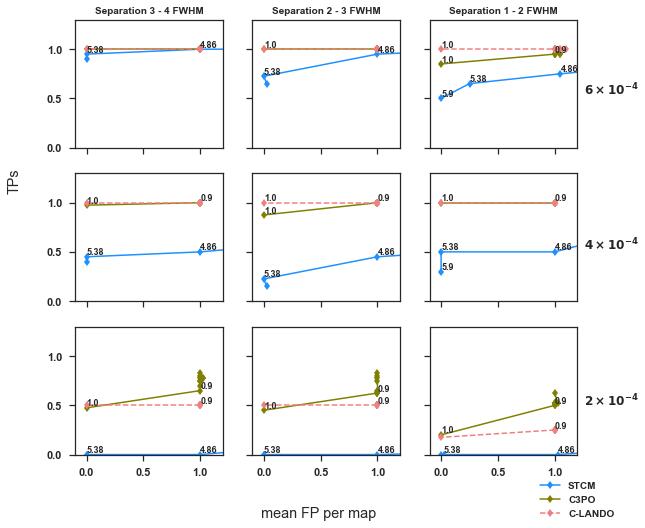

In [45]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("notebook", font_scale=1.0)

fig,axs = plt.subplots(3,3,sharey=True,sharex=True,figsize=(9,8))
labels =['STCM','C3PO','C-LANDO']
colors = ['dodgerblue','olive','lightcoral']
linestyles = ['solid','solid','dashed']
for row in range(len(all_fps)):
    for col in range(3):
        for j in range(3):
            axs[row][col].plot(all_fps[row][col][j],all_tps[row][col][j],label = labels[j],marker='d',
                               color=colors[j],
                               linestyle = linestyles[j])


            axs[0][col].set_title("Separation {0:d} - {1:d} FWHM".format(int(start_pixs[col]/4.8),
                                                                         int(end_pixs[col]/4.8)),fontweight='bold',fontsize=10)
            axs[row][col].set_xlim(-0.1,1.2)
            axs[row][col].set_ylim(0,1.3)
            start = 8
            if(j ==0):
                start = 7
            else:
                start = 8
            for sing in range(start,10):
            
                #if()
                txt = axs[row][col].text(all_fps[row][col][j][sing],all_tps[row][col][j][sing]+sep,
                              '{0:s}'.format(str(np.round(all_thresh[row][col][j][sing],2))),fontsize=9)
                plt.draw()
                if any(txt.get_window_extent().overlaps(t.get_window_extent()) for t in axs[row][col].texts[:-1]):
                    txt.remove() 
                
            #axs[row][col].set_yscale('log')
handles, labels = axs[1][1].get_legend_handles_labels()

fig.legend(handles=handles,labels=labels,loc=(0.83,0.01),fontsize=10)
fig.text(0.91,0.75,'$6\\times10^{-4}$',fontsize=12)
fig.text(0.91,0.48,'$4\\times10^{-4}$',fontsize=12)
fig.text(0.91,0.21,'$2\\times10^{-4}$',fontsize=12)
fig.supxlabel("mean FP per map")
fig.supylabel("TPs",x=0.02,y=0.6)
#fig.text(0.1,0.05,"({0:s}-{1:s})".format(str(np.round(all_thresh[0][0][0][7],2)),
                                         # str(np.round(all_thresh[0][0][0][9],2))),color='dodgerblue')
#fig.text(0.1,0.03,"({0:s}-{1:s})".format(str(np.round(all_thresh[0][0][1][8],2)),
                                         #str(np.round(all_thresh[0][0][1][9],2))),color='olive')
fig.savefig("/mnt/diskss/home/rnath/NathRanga2024/Paper/fig4_Apr2024_referee.png",dpi=400)
#axs[i][j].set_aspect('equal','box')str(np.round(all_thresh[0][0][0][9],3))

In [1403]:
all_thresh[-1][1][:]

[array([1.2      , 1.7222222, 2.2444444, 2.7666667, 3.288889 , 3.8111112,
        4.3333335, 4.8555555, 5.3777776, 5.9      ], dtype=float32),
 array([0.09 , 0.191, 0.292, 0.393, 0.494, 0.595, 0.696, 0.797, 0.898,
        0.999], dtype=float32),
 array([0.09 , 0.191, 0.292, 0.393, 0.494, 0.595, 0.696, 0.797, 0.898,
        0.999], dtype=float32)]

# Discussions

## velocity

In [46]:
mask = 3.5
start_pix =19.0
end_pix =23.0
C_low = 3e-04
C_high = 5e-04
tpr_stim = open_fits("stats_roc_runs_vel/tpr_stim_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
tpr_sodinn = open_fits("stats_roc_runs_novel_fixedthresh/v0/tpr_sodinn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
tpr_cnn = open_fits("stats_roc_runs_novel_fixedthresh//tpr_cnn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
fpr_stim = open_fits("stats_roc_runs_vel/fpr_stim_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
fpr_sodinn = open_fits("stats_roc_runs_novel_fixedthresh/v0/fpr_sodinn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:3.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
#fpr_rf_2 = open_fits("stats_roc_runs/fpr_rf_mask_3.5_cont_from1e-04_to_5e-04_rad_from_19.00_to_23.00.fits")
fpr_cnn = open_fits("stats_roc_runs_novel_fixedthresh//fpr_cnn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
thresh_stim_vel = open_fits("stats_roc_runs_vel/thresh_stim_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
thresh_cnn = open_fits("stats_roc_runs_novel_fixedthresh//thresh_cnn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))
thresh_sodinn = open_fits("stats_roc_runs_novel_fixedthresh//thresh_sodinn_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pix,end_pix,C_low,C_high))

Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)


In [47]:
C_low = [3e-04,1e-04]
C_high = [5e-04,3e-04]
start_pixs=[19]#[9,14,19]
end_pixs = [23]#[13,18,23]
all_tpsnovel=[]
all_fpsnovel=[]
all_threshnovel=[]
for c in range(len(C_low)):
    tprsnovel=[]
    fpsnovel=[]
    threshnovel=[]
    for i in range(len(start_pixs)):
        tprs_peralgonovel=[]
        fps_peralgonovel=[]
        thresh_peralgonovel=[]
        for string in ['cnn','sodinn']:
            if(string =='sodinn'):
                tprs_peralgonovel.append(open_fits("stats_roc_runs_novel_fixedthresh/v0/tpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
                fps_peralgonovel.append(open_fits("stats_roc_runs_novel_fixedthresh/v0/fpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
                thresh_peralgonovel.append(open_fits("stats_roc_runs_novel_fixedthresh/v0/thresh_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
            else:
                tprs_peralgonovel.append(open_fits("stats_roc_runs_novel_fixedthresh/tpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
                fps_peralgonovel.append(open_fits("stats_roc_runs_novel_fixedthresh//fpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
                thresh_peralgonovel.append(open_fits("stats_roc_runs_novel_fixedthresh//thresh_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
        tprsnovel.append(tprs_peralgonovel)
        fpsnovel.append(fps_peralgonovel)
        threshnovel.append(thresh_peralgonovel)
    all_tpsnovel.append(tprsnovel)
    all_fpsnovel.append(fpsnovel)
    all_threshnovel.append(threshnovel)

Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)


In [210]:
fpf_cnn=[282., 158., 150., 152., 150., 150.,  75.,  75.,  75.,  75.,] 
fpf_sodinn=[225., 225., 225., 224., 148., 142.,  75.,  75.,  76.,  75.,] 
fpf_rf =[145.,  77.,  75.,  75., 156., 150., 150., 150., 225.,  75.,]
#tpf_stim=[67., 51., 50., 50., 49., 45., 34., 26., 25., 23.,]
tpf_cnn=[55., 54., 52., 50., 50., 50., 50., 50., 50., 42.,] 
tpf_sodinn=[51., 52., 50., 49., 48., 46., 46., 46., 46., 37.,] 

In [49]:
mask = 3.5
#start_pix =19.0
#end_pix =23.0
C_low = [3e-04,1e-04]
C_high = [5e-04,3e-04]
start_pixs=[19]#[9,14,19]
end_pixs = [23]#[13,18,23]
all_tps=[]
all_fps=[]
all_thresh=[]
for c in range(len(C_low)):
    tprs=[]
    fps=[]
    thresh=[]
    for i in range(len(start_pixs)):
        tprs_peralgo=[]
        fps_peralgo=[]
        thresh_peralgo=[]
        for string in ['stim','cnn','sodinn']:
            tprs_peralgo.append(open_fits("stats_roc_runs_vel_fixedthresh/tpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
            fps_peralgo.append(open_fits("stats_roc_runs_vel_fixedthresh/fpr_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
            thresh_peralgo.append(open_fits("stats_roc_runs_vel_fixedthresh/thresh_{4:s}_mask_3.5_cont_from{2:1.0e}_to_{3:1.0e}_\
rad_from_{0:2.2f}_to_{1:2.2f}.fits".format(start_pixs[i],end_pixs[i],C_low[c],C_high[c],string)))
        tprs.append(tprs_peralgo)
        fps.append(fps_peralgo)
        thresh.append(thresh_peralgo)
    all_tps.append(tprs)
    all_fps.append(fps)
    all_thresh.append(thresh)

Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)
Fits HDU-0 data successfully loaded. Data shape: (10,)


In [185]:
len(all_fps)

2

Text(0.5, 1.0, 'mean Contrast $<4\\times10^{-4}$ between $3-4$ FWHM ')

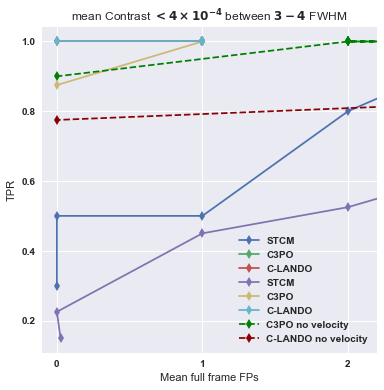

In [214]:
fig,axs = plt.subplots(1,1,figsize=(6,6))
labels =['STCM','C3PO','C-LANDO']
for row in range(len(all_fps)):
    for j in range(len(labels)):
        axs.plot(all_fps[row][][j],all_tps[0][row][j],label = labels[j],marker='d')
#axs.plot(np.asarray(fpf_cnn)/75,np.asarray(tpf_cnn)/75,c='green',ls='--',marker='d',
 #        label ='C3PO no velocity')
axs.plot(fpr_cnn,tpr_cnn,marker='d',c='green',ls='--',
         label ='C3PO no velocity')
#axs.plot(np.asarray(fpf_sodinn)/75,np.asarray(tpf_sodinn)/75,c='darkred',ls='--',marker='d',
 #       label ='C-LANDO no velocity')
axs.plot(fpr_sodinn,tpr_sodinn,marker='d',c='darkred',ls ='--',
         label ='C-LANDO no velocity')
#axs.plot(fpr_rf,tpr_rf,marker='d',c='teal',ls ='--',
 #        label ='C-LANDO no velocity')
axs.set_xlim(-0.1,2.2)
axs.set_xticks([0,1,2])
plt.xlabel("Mean full frame FPs")
plt.ylabel("TPR")
plt.legend()
plt.title("mean Contrast $<4\\times10^{-4}$ between $3-4$ FWHM ")
#fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/fig6_disc_23Feb.png",dpi=400)

In [179]:
tpr_sodinn,fpr_sodinn

(array([0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825,
        0.775], dtype=float32),
 array([4.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 3.  , 2.95, 0.  ],
       dtype=float32))

In [226]:

(C_low[row]+C_high[row])/2

0.00039999999999999996

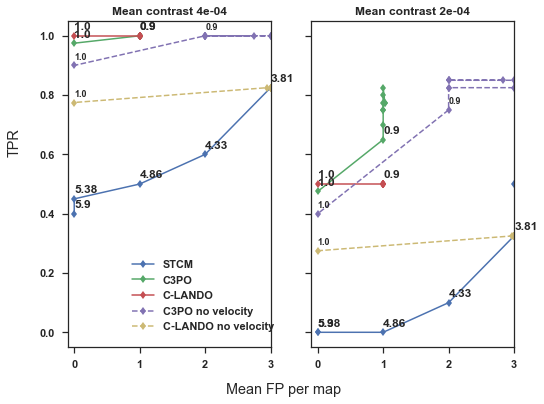

In [78]:
fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(8,6))
#fig.ax.set_xlim(-0.1,2.1)
labels =['STCM','C3PO','C-LANDO']
for row in range(len(all_fps)):
    for col in range(1):
        for j in range(len(labels)):
            axs[row].plot(all_fps[row][col][j],all_tps[row][col][j],label = labels[j],marker='d')
            #axs[row].set_title("Separation {0:d} - {1:d} FWHM".format(int(start_pixs[col]/4.8),int(end_pixs[col]/4.8)))
            axs[row].set_title("Mean contrast {0:1.0e}".format((C_low[row]+C_high[row])/2),fontweight='bold')
            #axs[row].set_xlim(-0.1,1.2)
            if j==0:
                start =5
            else:
                start =8
            for sing in range(start,10):
                axs[row].text(all_fps[row][col][j][sing],all_tps[row][col][j][sing]+0.02,
                              '{0:s}'.format(str(np.round(all_thresh[row][col][j][sing],2))))
            #axs[row][col].set_xscale('log')
handles, leg_labels = axs[1].get_legend_handles_labels()
#fig.ax.set_xlim(-0.1,2.1)
labels =['C3PO no velocity','C-LANDO no velocity']
for row in range(len(all_fpsnovel)):
        for j in range(len(labels)):
            axs[row].plot(all_fpsnovel[row][col][j],all_tpsnovel[row][col][j],label = labels[j],marker='d',ls='--')
            #axs[row].set_title("Separation {0:d} - {1:d} FWHM".format(int(start_pixs[col]/4.8),int(end_pixs[col]/4.8)))
            #axs[row].set_xlim(-0.1,2)
           
            for sing in range(8,10):
                #axs[row].text(all_fpsnovel[row][col][j][sing]+0.04,all_tpsnovel[row][col][j][sing]+0.02,
                 #             '{0:s}'.format(str(np.round(all_threshnovel[row][col][j][sing],2))))
                txt = axs[row].text(all_fpsnovel[row][col][j][sing],all_tpsnovel[row][col][j][sing]+sep,
                              '{0:s}'.format(str(np.round(all_threshnovel[row][col][j][sing],2))),fontsize=9)
                plt.draw()
                if any(txt.get_window_extent().overlaps(t.get_window_extent()) for t in axs[row].texts[:-1]):
                    txt.remove() 
                
                
            

            #axs[row][col].set_xscale('log')
#fig.ax.set_xlim(-0.1,2.1)
h,l = axs[1].get_legend_handles_labels()
axs[0].set_xlim(-0.1,3)
axs[0].set_xticks([0,1,2,3])
#ig.legend()
fig.legend(bbox_to_anchor=(0.5, 0.35),handles=h,labels=l)
#fig.text(0.002,0.75,'$6\\times10^{-4}$')
#fig.text(0.88,0.48,'Separation\n3-4 FWHM',)
#fig.text(0.002,0.21,'$2\\times10^{-4}$')
fig.supxlabel("Mean FP per map")
fig.supylabel("TPR",x=0.02,y=0.6)
fig.savefig("/mnt/diskss/home/rnath/NathRanga2024/Paper/Fig6_April2024_referee.png",dpi=400)

In [65]:
texts

[Text(0.0, 0.9399999761581421, '1.0')]

In [228]:
len(all_fpsnovel)

1

In [194]:
help(fig.legend)

Help on method legend in module matplotlib.figure:

legend(*args, **kwargs) method of matplotlib.figure.Figure instance
    Place a legend on the figure.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to these three different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        fig.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        fig.legend()
    
    Specific lines can be excluded from the automatic legend elem

In [ ]:
pl

## Spatial dimension

In [271]:
prefix = "/mnt/disk12tb/Users/rakesh/SpatialDetection/Training_vel/Training/"
h1_patches_lc = open_fits(prefix+"H1patches/H1_seq_training_cont_5e-04_rad_22.0_theta_120.00.fits")
h1_patches_hc = open_fits(prefix+"H1patches/H1_seq_training_cont_1e-04_rad_22.0_theta_120.00.fits")

Fits HDU-0 data successfully loaded. Data shape: (83, 20, 11, 11)
Fits HDU-0 data successfully loaded. Data shape: (83, 20, 11, 11)


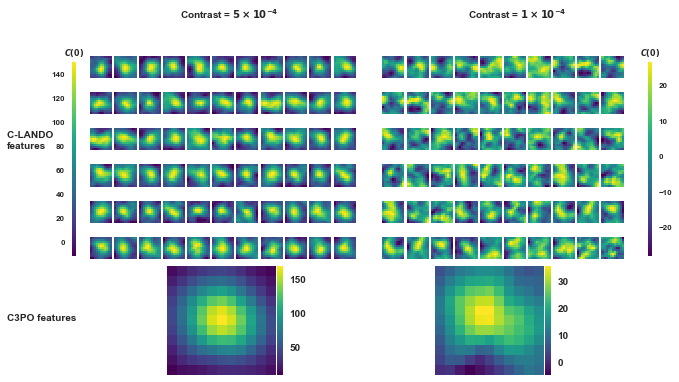

In [277]:
fig = plt.figure(figsize=(10,6
                         ))
rows = 9
columns =23
grid = plt.GridSpec(rows, columns,hspace=0.0001,wspace=0.1)
for i in range(6):
    for j in range(11):
   #fig.add_subplot(4,6,i)
            
        temp_cube = j+i*7
        ax = plt.subplot(grid[i,j])
        if(j ==0):
            ax.set_yticklabels("")
            #ax.set_xticklabels("")
        if(i ==5):
            ax.set_xticks([0,10])
            ax.set_xticklabels("")
            ax.set_yticklabels("")
        else:
            ax.set_xticklabels("")
            ax.set_yticklabels("")
        plt.pcolormesh(h1_patches_lc[temp_cube,10,:,:],cmap='viridis')
        ax.set_aspect('equal', 'box')
cbar_ax = fig.add_axes([0.1, 0.4, 0.005, 0.45])
cb1=fig.colorbar(ax.collections[0], cax=cbar_ax,orientation='vertical')
cb1.ax.yaxis.set_ticks_position('left')
cb1.ax.tick_params(labelsize=8)
cb1.ax.set_title('$C(0)$',fontsize=8)
#fig.add_subplot(4,6,([20,21,22,23]))
ax = plt.subplot(grid[6:10,3:8])
plt.pcolormesh(np.mean(h1_patches_lc,axis=0)[10,:,:],cmap='viridis')
ax.set_xticklabels("")
ax.set_yticklabels("")
plt.colorbar(fraction=0.046, pad=0.01)
ax.set_aspect('equal', 'box')
for i in range(6):
    for j in range(12,22):
   #fig.add_subplot(4,6,i)
        temp_cube = j+i*7
        ax = plt.subplot(grid[i,j])
        plt.pcolormesh(h1_patches_hc[temp_cube,10,:,:],cmap='viridis')
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.set_aspect('equal', 'box')
#fig.add_subplot(4,6,([20,21,22,23]))
cbar_ax = fig.add_axes([0.9, 0.4, 0.005, 0.45])
cb1=fig.colorbar(ax.collections[0], cax=cbar_ax,orientation='vertical')
cb1.ax.yaxis.set_ticks_position('right')
cb1.ax.tick_params(labelsize=8)
cb1.ax.set_title('$C(0)$',fontsize =8)
ax= plt.subplot(grid[6:10,14:19])
plt.pcolormesh(np.mean(h1_patches_hc,axis=0)[10,:,:],cmap='viridis')
plt.colorbar(fraction=0.046, pad=0.01)
ax.set_aspect('equal', 'box')
ax.set_xticklabels("")
ax.set_yticklabels("")
fig.text(0.25,0.95,"Contrast = $5\\times10^{-4}$")
fig.text(0.65,0.95,"Contrast = $1\\times10^{-4}$")
fig.text(0.01,0.65,'C-LANDO \nfeatures')
fig.text(0.01,0.25,'C3PO features')
fig.savefig("/mnt/diskss/home/rnath/SpatialDetectionML/PaperPlots_Dec2022/fig5_disc_dec2023.png",dpi=400)